# Import Necessary Modules

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Take grayscale image of size 512x512 and perform the following operations

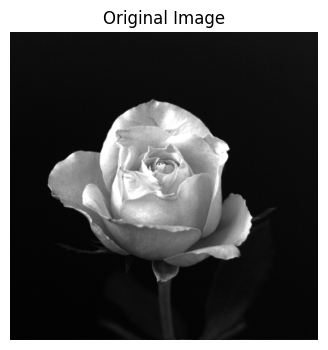

In [66]:
img = cv2.imread("flower.tif", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(4, 4))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## (a) Decrease its spatial resolution by half every time and observe its change when displaying in the same window size

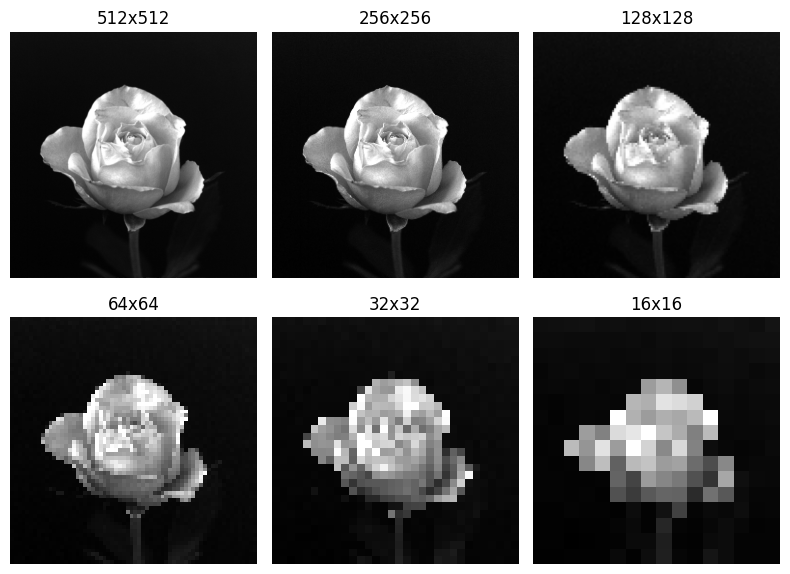

In [67]:
imgs = []
tmp = img.copy()

for k in range(6):
  imgs.append(tmp)
  tmp = tmp[::2, ::2]

plt.figure(figsize=(8, 6))
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(imgs[i], cmap='gray')
  plt.title(f"{imgs[i].shape[0]}x{imgs[i].shape[1]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

## (b) Decrease its intensity level resolution by one bit up to reach its binary format observe its change when displaying in the same window size

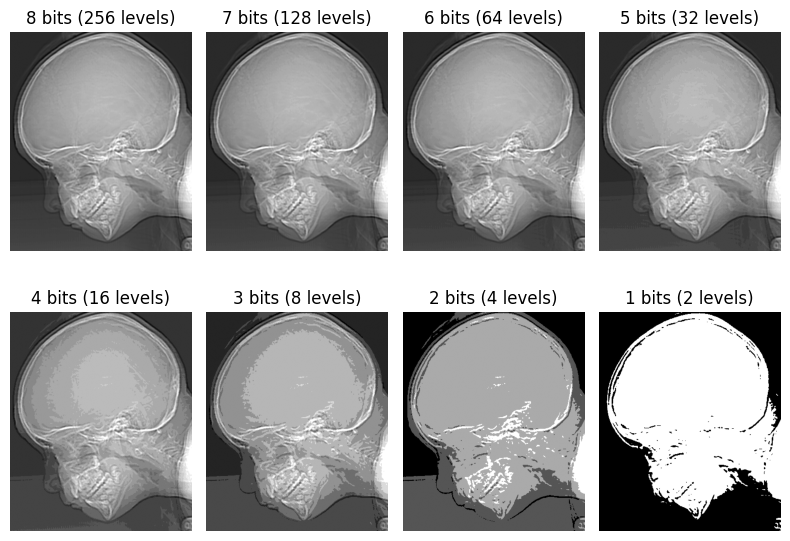

In [68]:
img = cv2.imread("ctskull.tif", cv2.IMREAD_GRAYSCALE)
imgs = []

for bits in range(0, 8):
  levels = 2 ** bits
  imgs.append(img // levels)

plt.figure(figsize=(8, 6))
for i, tmp in enumerate(imgs):
  plt.subplot(2, 4, i + 1)
  plt.imshow(tmp, cmap='gray')
  plt.title(f"{8 - i} bits ({2**(8 - i)} levels)")
  plt.axis('off')
plt.tight_layout()
plt.show()

## (c) Illustrate the histogram of the image and make single threshold segmentation observed from the histogram

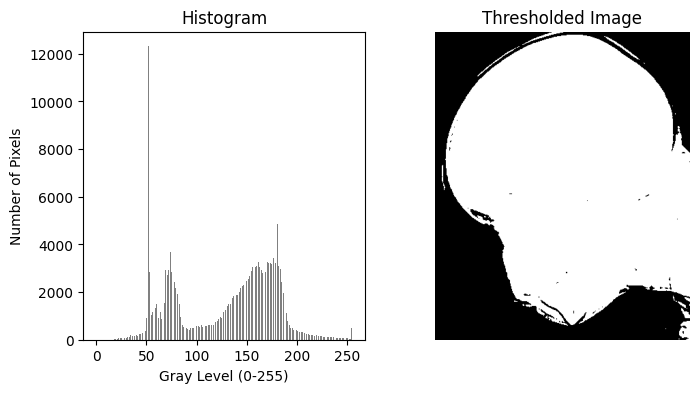

In [69]:
histogram = np.zeros(256, dtype=int)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    histogram[img[i][j]] += 1

# The valey is at 100. Hence, threshold value, T = 100
thresholded_img = img.copy()
thresholded_img[thresholded_img < 100] = 0
thresholded_img[thresholded_img >= 100] = 255

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(range(256), histogram, color='gray')
plt.title("Histogram")
plt.xlabel("Gray Level (0-255)")
plt.ylabel("Number of Pixels")

plt.subplot(1, 2, 2)
plt.imshow(thresholded_img, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()